In [15]:
import matplotlib.pyplot as plt
import numpy

# 로이터 뉴스 데이터셋 불러오기
from tensorflow import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras import utils

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tensorflow.set_random_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=200)
x_test = sequence.pad_sequences(X_test, maxlen=200)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)
print(x_train.shape)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
(8982, 200)


In [16]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 200))
model.add(LSTM(100, activation='tanh', dropout=0.3))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3448 - loss: 2.8669 - val_accuracy: 0.4804 - val_loss: 2.0800
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4852 - loss: 2.0503 - val_accuracy: 0.5111 - val_loss: 2.0017
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5114 - loss: 1.9552 - val_accuracy: 0.5142 - val_loss: 1.9620
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5316 - loss: 1.8203 - val_accuracy: 0.5343 - val_loss: 1.7754
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5508 - loss: 1.7228 - val_accuracy: 0.5788 - val_loss: 1.6749
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5775 - loss: 1.6614 - val_accuracy: 0.5913 - val_loss: 1.6297
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6071 - loss: 1.5715 - val_accuracy: 0.5997 - val_loss: 1.6041
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6329 - loss: 1.4799 - val_accuracy: 0.6541 - v

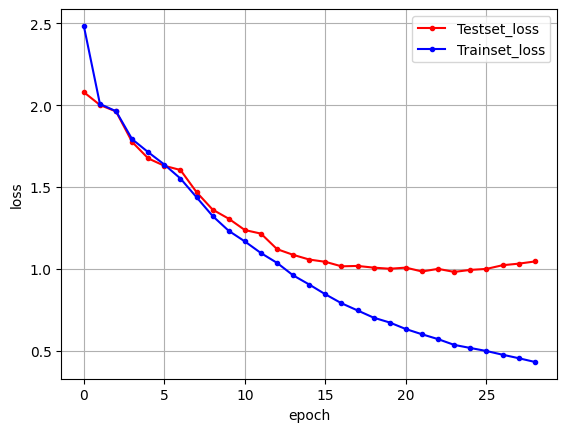

In [17]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
